# **COMPREHENSIVE DATA CLEANING AND SUMMARY STATISTICS ANALYSIS**

# **TASK 1: DATA CLEANING**

### Step 1: Load and Read the Data

In [147]:
# Step 1: Load and Read the Data

import pandas as pd
import numpy as np

data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA ANALYSIS\COMPREHENSIVE DATA CLEANING AND SUMMARY STATISTICS ANALYSIS\Data\train.csv"

train_df = pd.read_csv(data_path)

### Step 2: Initial Data Exploration

In [148]:
# Step 2: Initial Data Exploration
print("\nInitial Data Info:")
print(train_df.info())



Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [149]:
# Step 2.1: Check for Duplicates
duplicates = train_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    train_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")



Number of duplicate rows: 0


In [150]:
# Step 2.2: Check and Correct Data Types
print("\nData Types Before Correction:")
print(train_df.dtypes)



Data Types Before Correction:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [151]:
# Step 2.3: Correcting data types:

# Convert 'Survived' to categorical
train_df['Survived'] = train_df['Survived'].astype('category')

# Convert 'Embarked' to categorical
train_df['Embarked'] = train_df['Embarked'].astype('category')

# Convert 'Age' and 'Fare' to float if they are not already
train_df['Age'] = train_df['Age'].astype(float)
train_df['Fare'] = train_df['Fare'].astype(float)

print("\nData Types After Correction:")
print(train_df.dtypes)


Data Types After Correction:
PassengerId       int64
Survived       category
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


### Step 3: Display Initial Statistical Summary

In [152]:
# Step 3: Display Initial Statistical Summary
print("\nInitial Statistical Summary:")
print(train_df.describe(include='all'))


Initial Statistical Summary:
        PassengerId  Survived      Pclass                     Name   Sex  \
count    891.000000     891.0  891.000000                      891   891   
unique          NaN       2.0         NaN                      891     2   
top             NaN       0.0         NaN  Braund, Mr. Owen Harris  male   
freq            NaN     549.0         NaN                        1   577   
mean     446.000000       NaN    2.308642                      NaN   NaN   
std      257.353842       NaN    0.836071                      NaN   NaN   
min        1.000000       NaN    1.000000                      NaN   NaN   
25%      223.500000       NaN    2.000000                      NaN   NaN   
50%      446.000000       NaN    3.000000                      NaN   NaN   
75%      668.500000       NaN    3.000000                      NaN   NaN   
max      891.000000       NaN    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket       

### Step 4: Check for Missing Values

In [153]:
# Step 4: Check for Missing Values
missing_values = train_df.isnull().sum()
print("\nMissing Values Before Cleaning:")
print(missing_values[missing_values > 0])



Missing Values Before Cleaning:
Age         177
Cabin       687
Embarked      2
dtype: int64


### Step 5: Data Cleaning - Remove Missing 'Age' Values

In [154]:
# Step 5: Data Cleaning - Remove Missing 'Age' Values
train_df = train_df.dropna(subset=['Age'])


### Step 6: Fill Missing 'Fare' Values with the Median

In [155]:
# Step 6: Fill Missing 'Fare' Values with the Median
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)


### Step 7: Handle Missing Values for 'Embarked' and 'Cabin'

In [156]:
# Step 7: Handle Missing Values for 'Embarked' and 'Cabin'
# Fill missing 'Embarked' values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Handle 'Cabin' by filling or dropping
train_df['Cabin'].fillna('Unknown', inplace=True)  # or train_df.drop(columns=['Cabin'], inplace=True)


### Step 8: Check for Missing Values After Cleaning

In [157]:
# Step 8: Check for Missing Values After Cleaning
missing_values_after = train_df.isnull().sum()
print("\nMissing Values After Cleaning:")
print(missing_values_after[missing_values_after > 0])



Missing Values After Cleaning:
Series([], dtype: int64)


### Step 9: Check for Outliers Before Handling (Age)

In [158]:
# Step 9: Check for Outliers Before Handling (Age)
z_scores_before = np.abs((train_df['Age'] - train_df['Age'].mean()) / train_df['Age'].std())
outliers_before_age = train_df[z_scores_before >= 3]
print("\nOutliers for 'Age' Before Handling:")
print(outliers_before_age)



Outliers for 'Age' Before Handling:
     PassengerId Survived  Pclass                                  Name   Sex  \
630          631        1       1  Barkworth, Mr. Algernon Henry Wilson  male   
851          852        0       3                   Svensson, Mr. Johan  male   

      Age  SibSp  Parch  Ticket    Fare    Cabin Embarked  
630  80.0      0      0   27042  30.000      A23        S  
851  74.0      0      0  347060   7.775  Unknown        S  


# Step 10: Check for Outliers Before Handling (Fare)

In [159]:
# Step 10: Check for Outliers Before Handling (Fare)
Q1_before = train_df['Fare'].quantile(0.25)
Q3_before = train_df['Fare'].quantile(0.75)
IQR_before = Q3_before - Q1_before
outliers_before_fare = train_df[(train_df['Fare'] < (Q1_before - 1.5 * IQR_before)) | (train_df['Fare'] > (Q3_before + 1.5 * IQR_before))]
print("\nOutliers for 'Fare' Before Handling:")
print(outliers_before_fare)



Outliers for 'Fare' Before Handling:
     PassengerId Survived  Pclass  \
27            28        0       1   
34            35        0       1   
52            53        1       1   
61            62        1       1   
62            63        0       1   
..           ...      ...     ...   
820          821        1       1   
829          830        1       1   
835          836        1       1   
856          857        1       1   
879          880        1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
61                                 Icard, Miss. Amelie  female  38.0      0   
62                         Harris, Mr. Henry Birkhardt    male  45.0      1   
..                                         

### Step 11: Remove Outliers Using Z-Score Method (Age)

In [160]:
# Step 11: Remove Outliers for 'Age' Using Z-Score Method
z_scores = np.abs((train_df['Age'] - train_df['Age'].mean()) / train_df['Age'].std())
train_df = train_df[z_scores < 3]

# Step 11.1: Check for Outliers After Handling (Age)
z_scores_after = np.abs((train_df['Age'] - train_df['Age'].mean()) / train_df['Age'].std())
outliers_after_age = train_df[z_scores_after >= 3]

print("\nOutliers for 'Age' After Handling:")
print(outliers_after_age)



Outliers for 'Age' After Handling:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


### Step 12: Remove Outliers Using IQR Method (Fare) 

In [161]:
# Step 12: Remove Outliers for 'Fare' Using IQR Method
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[(train_df['Fare'] >= (Q1 - 1.5 * IQR)) & (train_df['Fare'] <= (Q3 + 1.5 * IQR))]

# Step 12.1: Check for Outliers After Handling (Fare)
Q1_after = train_df['Fare'].quantile(0.25)
Q3_after = train_df['Fare'].quantile(0.75)
IQR_after = Q3_after - Q1_after
outliers_after_fare = train_df[(train_df['Fare'] < (Q1_after - 1.5 * IQR_after)) | (train_df['Fare'] > (Q3_after + 1.5 * IQR_after))]

print("\nOutliers for 'Fare' After Handling:")
print(outliers_after_fare)



Outliers for 'Fare' After Handling:
     PassengerId Survived  Pclass  \
1              2        1       1   
54            55        0       1   
74            75        1       3   
92            93        0       1   
97            98        1       1   
151          152        1       1   
155          156        0       1   
169          170        0       3   
309          310        1       1   
329          330        1       1   
336          337        0       1   
356          357        1       1   
369          370        1       1   
370          371        1       1   
434          435        0       1   
509          510        1       3   
513          514        1       1   
523          524        1       1   
540          541        1       1   
577          578        1       1   
599          600        1       1   
615          616        1       2   
641          642        1       1   
690          691        1       1   
745          746        0       1   
7

###  Outlier Visualization and Removal for 'Fare' Column Using Box Plot

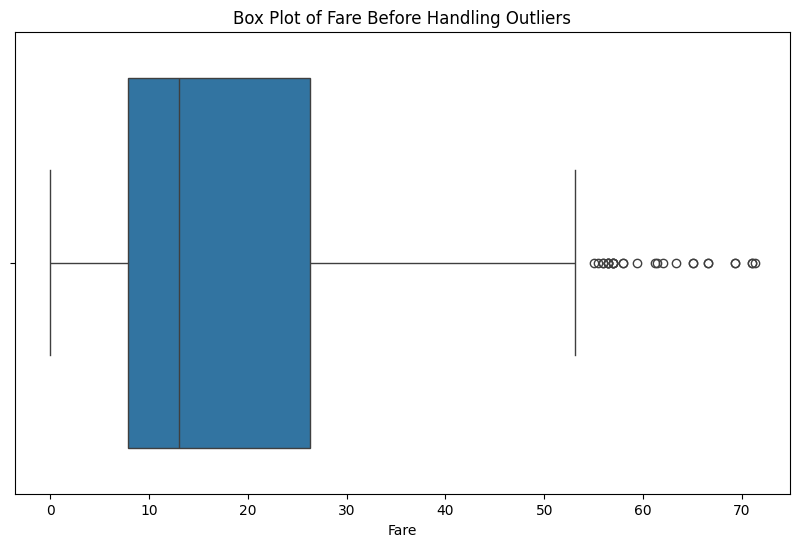

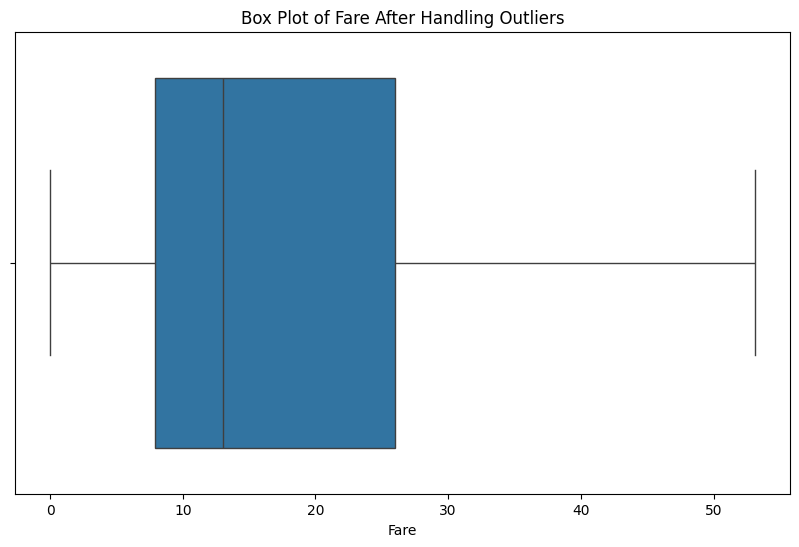

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a box plot for 'Fare' before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Box Plot of Fare Before Handling Outliers')
plt.xlabel('Fare')
plt.show()

# Step 2: Remove outliers using the IQR method
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[(train_df['Fare'] >= (Q1 - 1.5 * IQR)) & (train_df['Fare'] <= (Q3 + 1.5 * IQR))]

# Step 3: Create a box plot for 'Fare' after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Box Plot of Fare After Handling Outliers')
plt.xlabel('Fare')
plt.show()


### Step 13: Final Data Information

In [163]:
# Step 13: Final Data Information
print("\nData Info After Cleaning:")
print(train_df.info())


Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  590 non-null    int64   
 1   Survived     590 non-null    category
 2   Pclass       590 non-null    int64   
 3   Name         590 non-null    object  
 4   Sex          590 non-null    object  
 5   Age          590 non-null    float64 
 6   SibSp        590 non-null    int64   
 7   Parch        590 non-null    int64   
 8   Ticket       590 non-null    object  
 9   Fare         590 non-null    float64 
 10  Cabin        590 non-null    object  
 11  Embarked     590 non-null    category
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 52.1+ KB
None


### Step 14: Save Cleaned Data to a New CSV File

In [164]:
# Step 14: Save Cleaned Data to a New CSV File
cleaned_data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA ANALYSIS\COMPREHENSIVE DATA CLEANING AND SUMMARY STATISTICS ANALYSIS\cleaned_train.csv"
train_df.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned data saved to: {cleaned_data_path}")



Cleaned data saved to: D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA ANALYSIS\COMPREHENSIVE DATA CLEANING AND SUMMARY STATISTICS ANALYSIS\cleaned_train.csv


# **Task 2: CALCULATE SUMMARY STATISTICS**

### Step 15: Calculate Summary Statistics

In [165]:
# Step 15: Calculate Summary Statistics
summary_stats = {
    'Mean Age': train_df['Age'].mean(),
    'Median Age': train_df['Age'].median(),
    'Mode Age': train_df['Age'].mode()[0],
    'Standard Deviation Age': train_df['Age'].std(),
    'Mean Fare': train_df['Fare'].mean(),
    'Median Fare': train_df['Fare'].median(),
    'Mode Fare': train_df['Fare'].mode()[0],
    'Standard Deviation Fare': train_df['Fare'].std(),
    'Count of Survived': train_df['Survived'].value_counts(),
}


### Step 16: Display Summary Statistics

In [166]:
# Step 16: Display Summary Statistics
print("\nSummary Statistics:")
for stat, value in summary_stats.items():
    print(f"{stat}: {value}")



Summary Statistics:
Mean Age: 28.539406779661018
Median Age: 28.0
Mode Age: 19.0
Standard Deviation Age: 14.088066563999076
Mean Fare: 17.289201525423728
Median Fare: 13.0
Mode Fare: 13.0
Standard Deviation Fare: 11.731119433333369
Count of Survived: Survived
0    390
1    200
Name: count, dtype: int64


### Step 17: Detailed Statistical Summary for Numerical Columns

In [167]:
# Step 17: Detailed Statistical Summary for Numerical Columns
print("\nDetailed Statistical Summary for Numerical Columns:")
print(train_df.describe())



Detailed Statistical Summary for Numerical Columns:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   590.000000  590.000000  590.000000  590.000000  590.000000  590.000000
mean    448.601695    2.467797   28.539407    0.489831    0.400000   17.289202
std     263.696839    0.707573   14.088067    0.969342    0.856018   11.731119
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     211.250000    2.000000   20.000000    0.000000    0.000000    7.925000
50%     447.500000    3.000000   28.000000    0.000000    0.000000   13.000000
75%     683.750000    3.000000   36.000000    1.000000    0.000000   26.000000
max     891.000000    3.000000   71.000000    5.000000    6.000000   53.100000
